In [103]:
import pandas as pd
import numpy as np
import os

In [104]:
lfc = pd.read_csv(
    '../data/standardized_data/result_logfc_matrix_2020_08_27.csv')

In [105]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [106]:
# REMOVE ESSENTIALS!
# mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
# mbio.head()

In [107]:
# print(lfc.shape)
# lfc = pd.merge(lfc, mbio[['ORF ID', 'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
# print(lfc.shape)

In [108]:
# lfc = lfc[lfc['Final Call'] != 'ES']
# lfc = lfc.drop(columns = ['ORF ID', 'Final Call'])
# print(lfc.shape)

In [109]:
lfc.isna().sum()

Rv_ID                                           0
PE35_KO_vs_mbio_H37Rv                          65
PPE68_KO_vs_mbio_H37Rv                         65
Rv0950c_KO_vs_CB_WT                            65
Rv0954_KO_vs_RJ_WT                             65
                                               ..
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5    65
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10    65
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45    65
zhang_wt_mouse_d10_vs_zhang_input_library      65
zhang_wt_mouse_d45_vs_zhang_input_library      65
Length: 65, dtype: int64

In [110]:
lfc = lfc.dropna(axis=0)
lfc = lfc.T.reset_index()
lfc.columns = list(lfc.iloc[0, :])
lfc = lfc.iloc[1:, :]
lfc = lfc.rename(columns={'Rv_ID': 'Dataset'})

In [111]:
dataset_labels = pd.read_csv('../data/standardized_data_labels.csv')
lfc = lfc.merge(dataset_labels, how='left', on='Dataset')
lfc.head()

,Dataset,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,...,Rv3916c,Rv3917c,Rv3918c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c,Label
0,PE35_KO_vs_mbio_H37Rv,-0.41,3.28,-0.03,-3.81,-0.22,0.53,-0.44,-0.22,-0.13,...,0.55,-0.79,-0.01,0.01,0.06,1.98,-0.88,-0.32,0,flute
1,PPE68_KO_vs_mbio_H37Rv,0.01,2.38,-0.08,-3.39,0.14,0.37,-0.14,-0,-0.12,...,1.11,-0.04,0.16,0.29,0,1.92,-0.37,0.1,0,flute
2,Rv0950c_KO_vs_CB_WT,0,0,0.03,-2.6,0.13,-1.21,-0.47,0.43,-0.1,...,-0.15,-0.98,0.17,0.63,0.26,0.25,-0.12,-1.75,0,flute
3,Rv0954_KO_vs_RJ_WT,0,0,-1.2,-6.83,-0.08,1.66,-1.21,-0.51,0.78,...,3.06,3.94,-3.28,-1.56,-1.73,0.16,-0.82,3.01,0,flute
4,Rv1096_KO_vs_CB_WT,0,0,0.39,1.54,0.27,0.25,-0.34,0.58,0.11,...,-0.27,-0.32,-0.21,0.52,-0.05,0.87,0.47,0.28,0,flute


In [112]:
value_cols = [col for col in lfc.columns if col not in ['Dataset', 'Label']]

In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import *

In [114]:
lfc_scaled = StandardScaler().fit_transform(lfc[value_cols])
pca = PCA(3)
pca_results = pca.fit_transform(lfc_scaled)
# print(pca_results)
explained_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
pca_df = pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])

[0.15063175 0.08558577 0.05897992]


In [115]:
lfc = lfc.merge(pca_df, left_index=True, right_index=True)

In [116]:
lfc

,Dataset,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,...,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c,Label,pca1,pca2,pca3
0,PE35_KO_vs_mbio_H37Rv,-0.41,3.28,-0.03,-3.81,-0.22,0.53,-0.44,-0.22,-0.13,...,0.01,0.06,1.98,-0.88,-0.32,0,flute,-3.525756,-0.519760,-2.542578
1,PPE68_KO_vs_mbio_H37Rv,0.01,2.38,-0.08,-3.39,0.14,0.37,-0.14,-0,-0.12,...,0.29,0,1.92,-0.37,0.1,0,flute,-3.103914,-0.507246,-2.758270
2,Rv0950c_KO_vs_CB_WT,0,0,0.03,-2.6,0.13,-1.21,-0.47,0.43,-0.1,...,0.63,0.26,0.25,-0.12,-1.75,0,flute,-6.462516,1.631612,-0.460153
3,Rv0954_KO_vs_RJ_WT,0,0,-1.2,-6.83,-0.08,1.66,-1.21,-0.51,0.78,...,-1.56,-1.73,0.16,-0.82,3.01,0,flute,-7.649744,1.311634,0.241836
4,Rv1096_KO_vs_CB_WT,0,0,0.39,1.54,0.27,0.25,-0.34,0.58,0.11,...,0.52,-0.05,0.87,0.47,0.28,0,flute,-6.403935,1.056729,-2.379185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0,0,0.41,0,2.2,-2.05,0,0.15,-0.24,...,0.73,1.7,0,-0.76,0,0,zhang,-6.076601,-2.262722,-2.626482
60,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,0,0,1.3,0,-4.05,-2.93,-0.9,-0.26,0.26,...,0.54,2.99,0,1.65,0,0,zhang,-5.429591,-1.028559,-13.389250
61,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,0,0,-0.49,0.7,0.3,0.87,3.05,0.44,1.99,...,-1.56,0.75,0,-0.93,1.6,0,zhang,-1.974808,-2.947275,-10.195836
62,zhang_wt_mouse_d10_vs_zhang_input_library,0,0,-1.26,-2.62,0.69,3.7,-2.77,2.11,-1.39,...,-1.02,-7.54,0,-2.15,-3.8,0,zhang,-3.568598,9.392064,24.541046


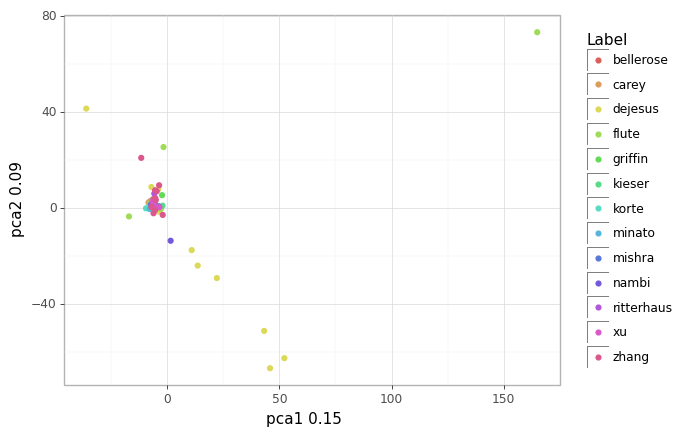

<ggplot: (8782978016285)>

In [117]:
(ggplot(lfc, aes(x='pca1', y='pca2', color='Label'))
 + geom_point()
 + theme_light()
 #+ geom_label(label=lfc.index, size=5, nudge_x=10)
 + xlab(f'pca1 {np.round(explained_var[0], 2)}')
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
 )

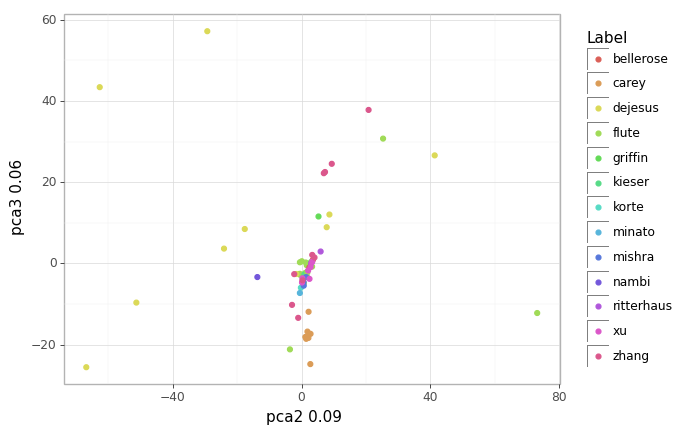

<ggplot: (8782978042273)>

In [118]:
(ggplot(lfc, aes(x='pca2', y='pca3', color='Label'))
 + geom_point()
 + theme_light()
 #+ geom_label(label=lfc.index, size=5, nudge_x=10)
 + xlab(f'pca2 {np.round(explained_var[1], 2)}')
 + ylab(f'pca3 {np.round(explained_var[2], 2)}')
 )

In [119]:
from sklearn.manifold import TSNE

In [120]:
tsne = TSNE(n_components=2).fit_transform(lfc_scaled)

In [121]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [122]:
lfc = lfc.merge(tsne, left_index=True, right_index=True)

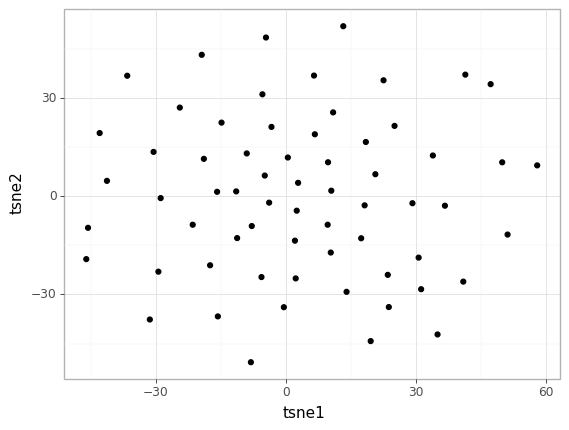

<ggplot: (8782977978929)>

In [123]:
(ggplot(lfc, aes(x='tsne1', y='tsne2'))+geom_point()+theme_light())

In [162]:
import scipy.cluster.hierarchy as shc
import palettable
# shc.set_link_color_palette(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf'])
import matplotlib.pyplot as plt
Z = shc.linkage(lfc[value_cols], method='ward', optimal_ordering=True)

In [174]:
# shc.set_link_color_palette(['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666'])
# shc.set_link_color_palette(['#000000']*9)
palette = palettable.colorbrewer.qualitative.Dark2_8.hex_colors
palette.append('#000000')
shc.set_link_color_palette(palette)

In [167]:
lfc.Label.isna().sum()

0

In [168]:
print(lfc[value_cols].shape, Z.shape)

(64, 3971) (63, 4)


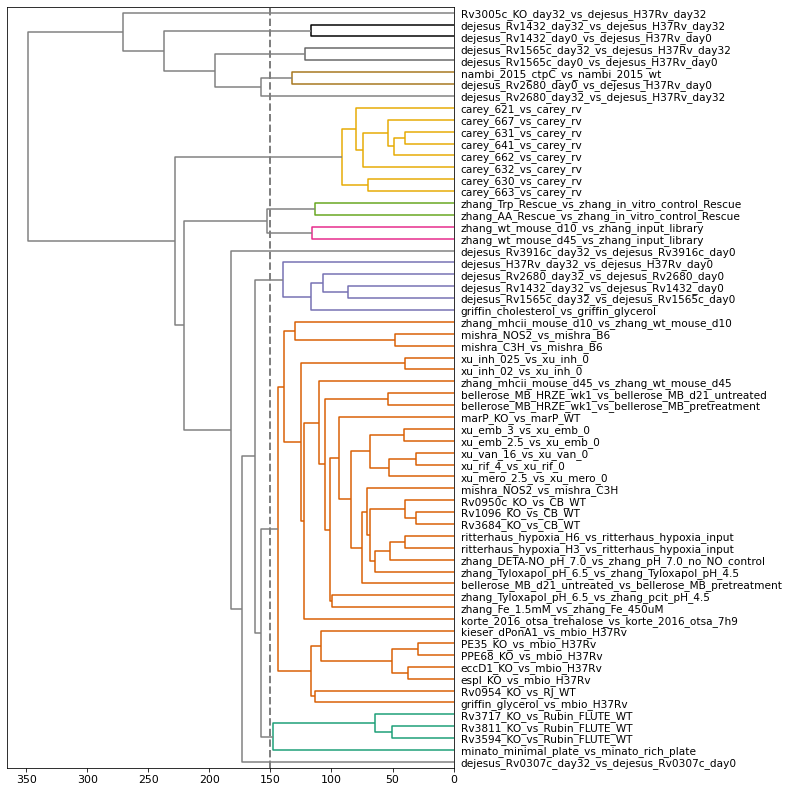

In [187]:
fig = plt.figure(figsize=(8, 14))
ax = fig.add_subplot(1, 1, 1)
shc.dendrogram(Z,  color_threshold=150, labels=lfc.Dataset.to_list(),
               orientation='left', above_threshold_color='grey')
ax.tick_params(axis='x', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=10.5)
plt.axvline(x=150, c='grey', lw=2, linestyle='dashed')
# label_palette = palettable.matplotlib.Inferno_13.hex_colors

# # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
# cat_label = pd.Categorical(lfc['Label'])
# # print(cat_label.codes)
# my_color = cat_label.codes

# # Apply the right color to each label
# ax = plt.gca()
# xlbls = ax.get_ymajorticklabels()
# num = -1
# for lbl in xlbls:
#     num += 1
#     val = my_color[num]
#     lbl.set_color(label_palette[val])


fig.savefig('dataset_dendrogram.jpg', bbox_inches='tight', dpi=500)

In [31]:
# from sklearn.cluster import AgglomerativeClustering
#  hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
# y_hc=hc.fit_predict(lfc[value_cols])

In [32]:
# lfc['y_hc']=y_hc

In [16]:
lfc

,Rv0003,Rv0004,Rv0007,Rv0008c,Rv0009,Rv0010c,Rv0011c,Rv0012,Rv0016c,Rv0017c,...,Rv3911,Rv3912,Rv3914,Rv3916c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.03,-3.81,-0.44,-0.22,-0.13,-0.06,0.42,-0.24,0.09,-0.12,...,-0.18,0.26,0.11,0.55,0.01,0.06,1.98,-0.88,-0.32,0
PPE68_KO_vs_mbio_H37Rv,-0.08,-3.39,-0.14,-0,-0.12,0.07,0.56,-0.74,-0.25,-0.19,...,0.07,0.31,0.53,1.11,0.29,0,1.92,-0.37,0.1,0
Rv0950c_KO_vs_CB_WT,0.03,-2.6,-0.47,0.43,-0.1,0.29,-1.6,0.29,-0.96,-0.65,...,-0.3,0.1,0.7,-0.15,0.63,0.26,0.25,-0.12,-1.75,0
Rv0954_KO_vs_RJ_WT,-1.2,-6.83,-1.21,-0.51,0.78,0.31,-6.75,-1.12,-4.57,-3.85,...,-0.38,0.36,-2.05,3.06,-1.56,-1.73,0.16,-0.82,3.01,0
Rv1096_KO_vs_CB_WT,0.39,1.54,-0.34,0.58,0.11,0.26,-1.98,-1.12,-0.84,-0.38,...,-0.17,0.12,1.55,-0.27,0.52,-0.05,0.87,0.47,0.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0.41,0,0,0.15,-0.24,-0.16,0,0.45,1.39,-1.39,...,0.22,1.45,0,0.91,0.73,1.7,0,-0.76,0,0
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,1.3,0,-0.9,-0.26,0.26,0.09,0,1.3,-2.29,6.59,...,-1.81,0.25,0,-8.39,0.54,2.99,0,1.65,0,0
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,-0.49,0.7,3.05,0.44,1.99,1.58,0,-0.17,2.39,1.99,...,0.12,-0.56,2.08,0.52,-1.56,0.75,0,-0.93,1.6,0


In [141]:
from sklearn.cluster import KMeans

In [142]:
k = lfc.Label.nunique()

In [144]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(lfc[value_cols])

In [145]:
y_pred = kmeans.predict(lfc[value_cols])

In [146]:
y_pred

array([ 4,  4, 10, 10, 10,  5, 10, 10, 10, 10, 10, 10, 10,  1,  1,  1,  1,
        1,  1,  1,  1,  7,  3,  2,  2,  0,  6,  6, 10, 11,  9,  0,  8,  4,
        4, 10,  4,  4, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  7, 10, 10,  7, 10, 10, 10, 10,  7,  7], dtype=int32)

In [147]:
lfc.Label

0     flute
1     flute
2     flute
3     flute
4     flute
      ...  
59    zhang
60    zhang
61    zhang
62    zhang
63    zhang
Name: Label, Length: 64, dtype: object

In [148]:
from sklearn.metrics import adjusted_rand_score

In [149]:
adjusted_rand_score(y_pred, lfc.Label)

0.11884057971014493

In [150]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters=k, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(lfc[value_cols])

In [151]:
adjusted_rand_score(y_hc, lfc.Label)

0.1398320554947061